In [1]:
from sklearn.datasets import load_digits

In [10]:
data = load_digits()

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [15]:
target = data.target

In [14]:
df.head(3)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,target, test_size=0.2)


In [79]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [80]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [81]:
model.score(X_train, y_train)

0.9944328462073765

In [82]:
model.score(X_test, y_test)

0.9777777777777777

In [83]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test))

In [84]:
cm

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  2],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 37]], dtype=int64)

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(50.722222222222214, 0.5, 'Truth')

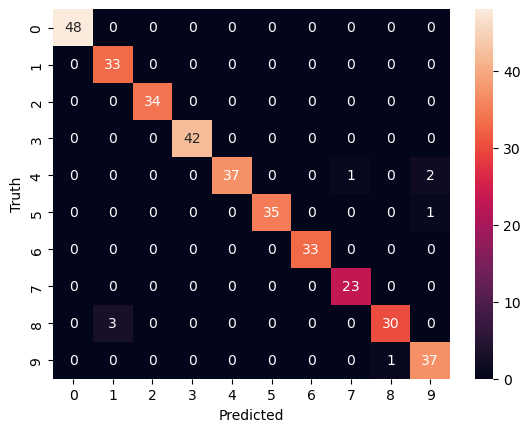

In [86]:
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.92      1.00      0.96        33
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        42
           4       1.00      0.93      0.96        40
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        33
           7       0.96      1.00      0.98        23
           8       0.97      0.91      0.94        33
           9       0.93      0.97      0.95        38

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [88]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(),{'n_neighbors' : [1,2,3,4,5,6,7, 8,9,10]}, cv=5,return_train_score=False)

In [89]:
clf.fit(df, target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [90]:
clf.cv_results_

{'mean_fit_time': array([0.0034061 , 0.00300126, 0.00320082, 0.00310106, 0.00320091,
        0.00299973, 0.00319967, 0.00360003, 0.00320134, 0.00290227]),
 'std_fit_time': array([4.84987143e-04, 2.61348526e-06, 4.00641673e-04, 2.02561884e-04,
        3.99997334e-04, 4.86280395e-07, 3.99661530e-04, 4.90193553e-04,
        4.00497019e-04, 1.99104439e-04]),
 'mean_score_time': array([0.10850468, 0.10831165, 0.10811296, 0.10911355, 0.10901527,
        0.10811272, 0.10841522, 0.10841646, 0.10771036, 0.10851398]),
 'std_score_time': array([0.00140578, 0.0011643 , 0.00049253, 0.00162801, 0.0010042 ,
        0.0004899 , 0.00080319, 0.00111705, 0.0007475 , 0.00089564]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 

In [91]:
clf.best_score_

0.9671711544413494

In [92]:
clf.best_params_

{'n_neighbors': 2}

In [93]:
model2 = KNeighborsClassifier(n_neighbors=2)

In [94]:
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [95]:
model2.score(X_train,y_train)

0.9895615866388309

In [96]:
model2.score(X_test,y_test)

0.9777777777777777